Primeras filas del dataset:
  Region  Profundidad_Pozo  Barriles_Diarios  Presion_Reservorio  \
0   Este              1011              1985                2698   
1  Oeste              2341              1423                1350   
2  Norte              1215               345                4726   
3   Este              1338               307                4471   
4   Este              2799              1154                3300   

   Temperatura_Reservorio  
0                     126  
1                     104  
2                     124  
3                      68  
4                      84  

Resumen estadístico:
       Profundidad_Pozo  Barriles_Diarios  Presion_Reservorio  \
count       2000.000000       2000.000000          2000.00000   
mean        2496.390500       1038.359500          2967.29150   
std          858.385853        566.161774          1149.76658   
min         1000.000000         50.000000          1005.00000   
25%         1757.000000        541.500000       

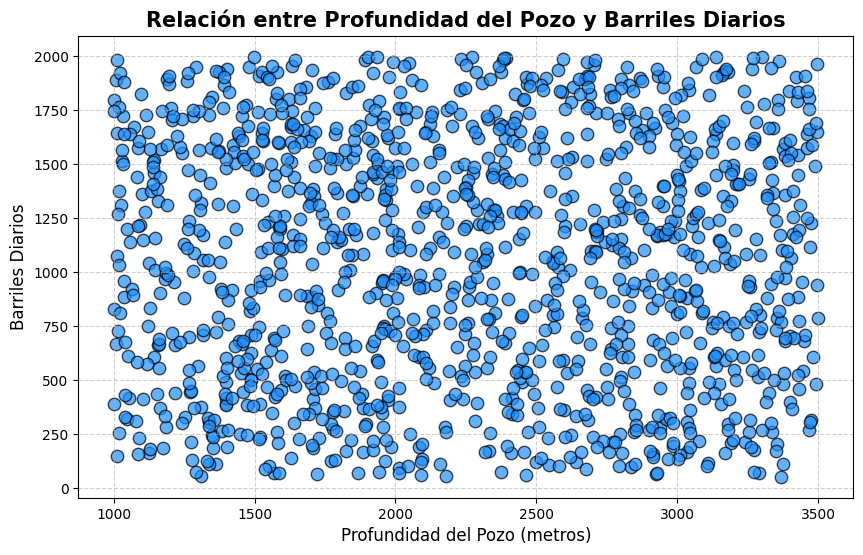

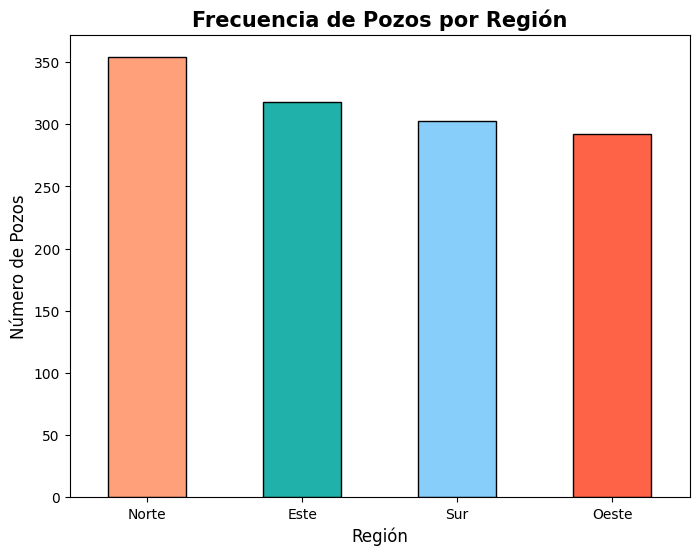

('datos_petroleo.csv', 'datos_petroleo_limpios.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar data ficticia de 2000 registros
np.random.seed(42)
data_size = 2000
data = {
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], size=data_size),
    'Profundidad_Pozo': np.random.randint(1000, 4000, size=data_size),  # En metros
    'Barriles_Diarios': np.random.randint(50, 2000, size=data_size),  # En barriles
    'Presion_Reservorio': np.random.randint(1000, 5000, size=data_size),  # En PSI
    'Temperatura_Reservorio': np.random.randint(50, 150, size=data_size)  # En grados Celsius
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV para su descarga antes de la limpieza
file_path = 'datos_petroleo.csv'
df.to_csv(file_path, index=False)

# Paso 2: Exploración de los datos
print("Primeras filas del dataset:")
print(df.head())

print("\nResumen estadístico:")
print(df.describe())

print("\nVerificar valores nulos:")
print(df.isnull().sum())

# Paso 3: Limpieza de datos: eliminar registros con valores fuera de rangos lógicos
df_cleaned = df[(df['Profundidad_Pozo'] >= 1000) & (df['Profundidad_Pozo'] <= 3500)]
df_cleaned = df_cleaned[(df_cleaned['Presion_Reservorio'] >= 1500) & (df_cleaned['Presion_Reservorio'] <= 4500)]

# Paso 4: Guardar los datos limpios en un archivo CSV
file_path_cleaned = 'datos_petroleo_limpios.csv'
df_cleaned.to_csv(file_path_cleaned, index=False)

# Paso 5: Visualización

# 1. Gráfico de dispersión mejorado: Relación entre Profundidad del Pozo y Barriles Diarios
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Profundidad_Pozo'], df_cleaned['Barriles_Diarios'],
            color='dodgerblue', edgecolor='black', s=80, alpha=0.7)
plt.title('Relación entre Profundidad del Pozo y Barriles Diarios', fontsize=15, fontweight='bold')
plt.xlabel('Profundidad del Pozo (metros)', fontsize=12)
plt.ylabel('Barriles Diarios', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2. Gráfico de barras mejorado: Frecuencia de pozos por Región
plt.figure(figsize=(8, 6))
df_cleaned['Region'].value_counts().plot(kind='bar', color=['#FFA07A', '#20B2AA', '#87CEFA', '#FF6347'], edgecolor='black')
plt.title('Frecuencia de Pozos por Región', fontsize=15, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Número de Pozos', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Enlaces de descarga
file_path, file_path_cleaned